In [6]:
!python --version

Python 3.6.9


In [7]:
!nvidia-smi

Tue May  5 20:14:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [8]:
# Importing Standard Python Libraries
ls = ['math','os','sys','datetime','shutil']
for i in ls:
    exec('import {0}'.format(i))
    exec('print("imported {0}")'.format(i))

imported math
imported os
imported sys
imported datetime
imported shutil


In [9]:
# Using GDrive storage as file-system for experimentation
from google.colab import drive
try:
    drive.mount('/content/gdrive')
    os.chdir('gdrive/My Drive/CNN_project')
except:
    pass

# Removing Permission if you want to unmount
# https://myaccount.google.com/permissions

os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


'/content/gdrive/My Drive/CNN_project'

In [0]:
# os.listdir()

In [0]:
# !unzip "/content/gdrive/My Drive/CNN_project/data.h5.zip" -d "./"

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing Standard Data Science & Plotting libraries
import numpy as np, pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
# Import# Importing Deep Learning Libraries
ls = ['tensorflow','h5py','sklearn']

for i in ls:
    exec('import {0}'.format(i))
    exec('print("Version of {0}",{0}.__version__)'.format(i))

Version of tensorflow 2.2.0-rc4
Version of h5py 2.10.0
Version of sklearn 0.22.2.post1


In [0]:
# Function to load data from extracted file
def loadDataH5():
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [16]:
trainX, trainY, testX, testY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [17]:
set(trainY), set(testY)

({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16})

In [18]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = (trainX, trainY), (testX, testY)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1020, 128, 128, 3)
1020 train samples
340 test samples


In [0]:
# Class for implementing variety of model architecture
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

num_classes = 17

class CNN:
    "Class for creating Variety of CNN architectures, and choose to experiment on them"

    def __init__(self, num_classes, input_shape, model_choice=0):
        self.num_classes = num_classes
        self.model = Sequential()
        if model_choice==0:
            'One Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==1:
            'One Convolution and Two fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(128,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==2:
            'Two Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==3:
            'Three Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==4:
            'Four Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==5:
            'Three Convolution and Two fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(128,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==6:
            'Two blocks, each of Two Convolutions in VGG style and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))      
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(MaxPooling2D())
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dense(512,activation='relu'))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))

    def train(self, train, test, batch_size=64, epochs=300, opt='Adam', lr=0.01, data_augmentation=False, verbose=1):
        "Method for Training Neural Network build within class"
        (x_train, y_train), (x_test, y_test) = train, test
        x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
        # Selcting optimizer and compiling model
        opt = eval('tensorflow.keras.optimizers.{}(learning_rate={})'.format(opt, lr))
        self.model.compile(loss='sparse_categorical_crossentropy',
                           optimizer=opt, metrics=['accuracy'])
        # Training data with or without data augmentation, depending upon user input
        if not data_augmentation:
            history = self.model.fit(x_train, y_train,
                                     batch_size=batch_size,
                                     epochs=epochs,
                                     validation_data=(x_test, y_test),
                                     shuffle=True,
                                     callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True),
                                                ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=10, min_delta=1e-4, min_lr=1e-6, verbose=1)],
                                     verbose=verbose,
                                     )
        else:
            datagen = ImageDataGenerator(
                rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
                # randomly shift images horizontally (fraction of total width)
                width_shift_range=0.1,
                # randomly shift images vertically (fraction of total height)
                height_shift_range=0.1,
                shear_range=0.25,  # set range for random shear
                zoom_range=0.5,  # set range for random zoom
                # set mode for filling points outside the input boundaries
                fill_mode='nearest',
                cval=0.,  # value used for fill_mode = "constant"
                horizontal_flip=True,  # randomly flip images
                vertical_flip=True,  # randomly flip images
                )

            datagen.fit(x_train)

            # Fit the model on the batches generated by datagen.flow().
            history = self.model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                                     epochs=epochs,
                                     steps_per_epoch = len(x_train)//batch_size,
                                     validation_data=(x_test, y_test),
                                     callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=15, restore_best_weights=True),
                                                ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=5, min_delta=1e-4, min_lr=1e-6, verbose=1)],
                                     verbose=verbose,
                                     workers=4)
        self.history = history.history

    def evaluate(self,x_test, y_test):
        scores = self.model.evaluate(x_test, y_test, verbose=1)
        print('Evaluated loss:'     , scores[0])
        print('Evaluated accuracy:' , scores[1])

    def predict(self,x_test):
        return self.model.predict(x_test, verbose=1)

    def plot(self, metric='loss'):
        "Plotting either loss or accuracy metric for both training and validation data"
        for key in self.history:
            if metric in key:
                plt.plot(self.history[key],label=key)
        plt.legend()
        plt.grid(True, which='both')
        plt.xlabel('Number of Epochs')
        plt.ylabel('{} value'.format(metric))
        plt.title('Training progress of {}'.format(metric))
        plt.show()

11/11 [==============================] - 0s 23ms/step - loss: 1.3406 - accuracy: 0.5853
Evaluated loss: 1.3405758142471313
Evaluated accuracy: 0.5852941274642944


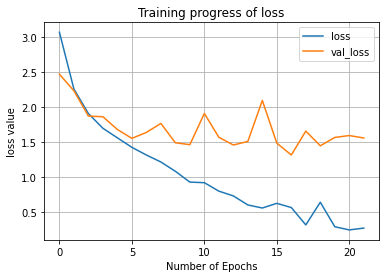

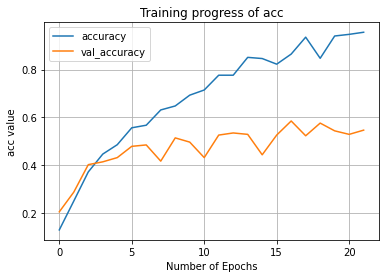

CPU times: user 34.2 s, sys: 17.2 s, total: 51.3 s
Wall time: 1min 5s


In [0]:
%%time
'One Convolution and One fully connected layer'
model_0 = CNN(num_classes, x_train.shape[1:], model_choice=0)
model_0.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_0.evaluate(x_test, y_test)
model_0.plot('loss') ; model_0.plot('acc')

11/11 [==============================] - 0s 24ms/step - loss: 1.3438 - accuracy: 0.5794
Evaluated loss: 1.3438037633895874
Evaluated accuracy: 0.5794117450714111


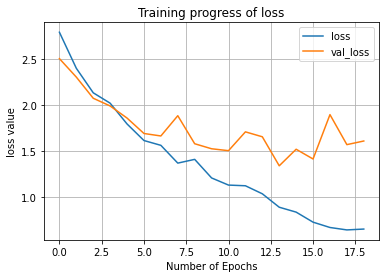

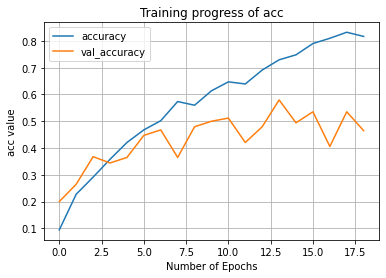

CPU times: user 29.3 s, sys: 13.3 s, total: 42.6 s
Wall time: 54.8 s


In [0]:
%%time
'One Convolution and Two fully connected layer'
model_1 = CNN(num_classes, x_train.shape[1:], model_choice=1)
model_1.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_1.evaluate(x_test, y_test)
model_1.plot('loss') ; model_1.plot('acc')

11/11 [==============================] - 0s 29ms/step - loss: 1.4322 - accuracy: 0.5500
Evaluated loss: 1.4321966171264648
Evaluated accuracy: 0.550000011920929


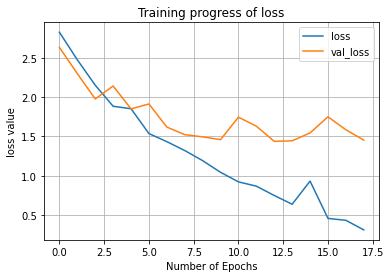

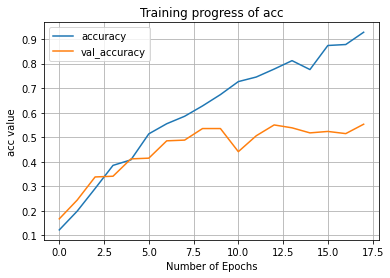

CPU times: user 34 s, sys: 17.5 s, total: 51.5 s
Wall time: 1min 7s


In [0]:
%%time
'Two Convolution and One fully connected layer'
model_2 = CNN(num_classes, x_train.shape[1:], model_choice=2)
model_2.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_2.evaluate(x_test, y_test)
model_2.plot('loss') ; model_2.plot('acc')

11/11 [==============================] - 0s 35ms/step - loss: 1.5278 - accuracy: 0.5265
Evaluated loss: 1.5278316736221313
Evaluated accuracy: 0.5264706015586853


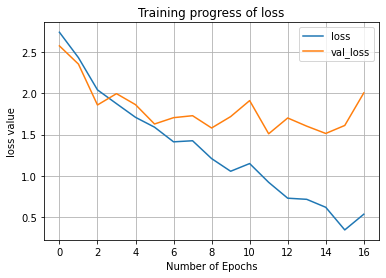

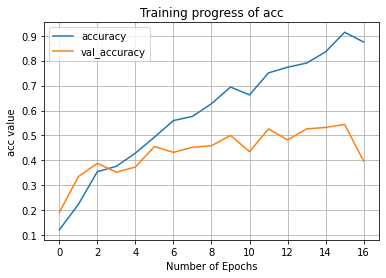

CPU times: user 35 s, sys: 19.2 s, total: 54.2 s
Wall time: 1min 14s


In [0]:
%%time
'Three Convolution and One fully connected layer'
model_3 = CNN(num_classes, x_train.shape[1:], model_choice=3)
model_3.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_3.evaluate(x_test, y_test)
model_3.plot('loss') ; model_3.plot('acc')

11/11 [==============================] - 0s 41ms/step - loss: 1.6119 - accuracy: 0.5324
Evaluated loss: 1.6119431257247925
Evaluated accuracy: 0.5323529243469238


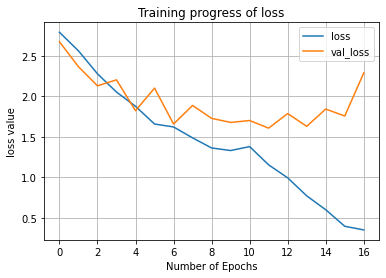

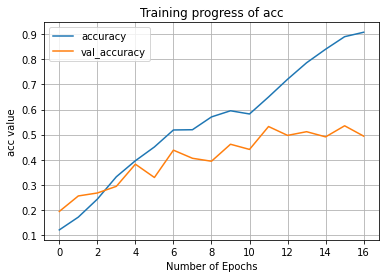

CPU times: user 37.8 s, sys: 22 s, total: 59.8 s
Wall time: 1min 23s


In [0]:
%%time
'Four Convolution and One fully connected layer'
model_4 = CNN(num_classes, x_train.shape[1:], model_choice=4)
model_4.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_4.evaluate(x_test, y_test)
model_4.plot('loss') ; model_4.plot('acc')

11/11 [==============================] - 0s 35ms/step - loss: 1.6843 - accuracy: 0.4235
Evaluated loss: 1.684334635734558
Evaluated accuracy: 0.42352941632270813


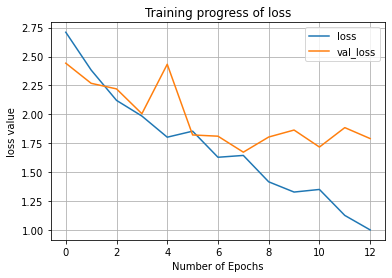

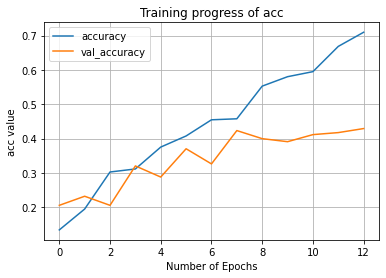

CPU times: user 26.6 s, sys: 14.2 s, total: 40.8 s
Wall time: 56.3 s


In [0]:
%%time
'Three Convolution and Two fully connected layer'
model_5 = CNN(num_classes, x_train.shape[1:], model_choice=5)
model_5.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_5.evaluate(x_test, y_test)
model_5.plot('loss') ; model_5.plot('acc')

11/11 [==============================] - 0s 20ms/step - loss: 1.7728 - accuracy: 0.4324
Evaluated loss: 1.772831678390503
Evaluated accuracy: 0.4323529303073883


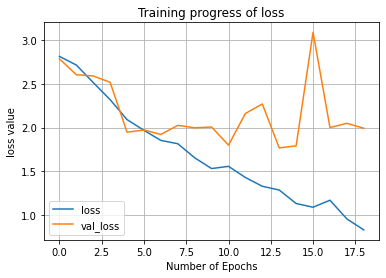

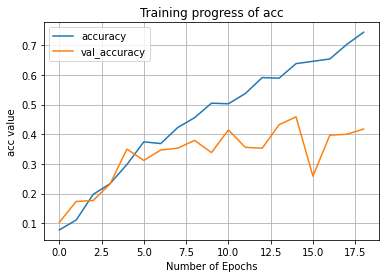

CPU times: user 19.5 s, sys: 9.11 s, total: 28.6 s
Wall time: 38.6 s


In [0]:
%%time
'Two blocks, each of Two Convolutions in VGG style and One fully connected layer'
model_6 = CNN(num_classes, x_train.shape[1:], model_choice=6)
model_6.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=False, verbose=0)
model_6.evaluate(x_test, y_test)
model_6.plot('loss') ; model_6.plot('acc')

In [0]:
# Data Augmentation with 2 Deepest modesl earlier Experimented upon


Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.
11/11 [==============================] - 0s 35ms/step - loss: 0.9924 - accuracy: 0.6559
Evaluated loss: 0.9924289584159851
Evaluated accuracy: 0.6558823585510254


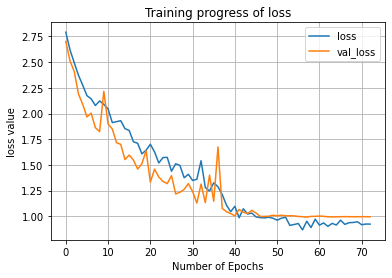

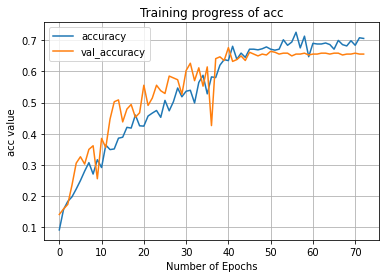

CPU times: user 8min 39s, sys: 1min 11s, total: 9min 50s
Wall time: 4min 50s


In [0]:
%%time
'Three Convolution and Two fully connected layer'
model_5 = CNN(num_classes, x_train.shape[1:], model_choice=5)
model_5.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_5.evaluate(x_test, y_test)
model_5.plot('loss') ; model_5.plot('acc')


Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00096: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.

Epoch 00122: ReduceLROnPlateau reducing learning rate to 4.572473396062074e-06.

Epoch 00127: ReduceLROnPlateau reducing learning rate to 1.5241577481598747e-06.

Epoch 00132: ReduceLROnPlateau reducing learning rate to 1e-06.
11/11 [==============================] - 0s 20ms/step - loss: 1.1791 - accuracy: 0.6118
Evaluated loss: 1.1790610551834106
Evaluated accuracy: 0.6117647290229797


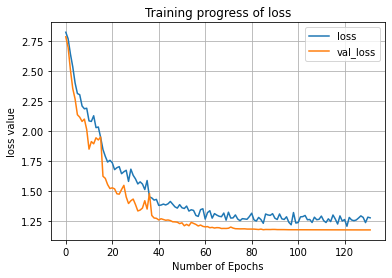

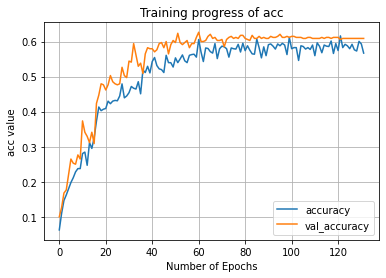

CPU times: user 15min 12s, sys: 50.7 s, total: 16min 3s
Wall time: 4min 22s


In [0]:
%%time
'Two blocks, each of Two Convolutions in VGG style and One fully connected layer'
model_6 = CNN(num_classes, x_train.shape[1:], model_choice=6)
model_6.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_6.evaluate(x_test, y_test)
model_6.plot('loss') ; model_6.plot('acc')

In [0]:
%%time
"Retraining all Architectures with Data Augrmentation for creating ensemble"
model_0 = CNN(num_classes, x_train.shape[1:], model_choice=0)
model_0.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_1 = CNN(num_classes, x_train.shape[1:], model_choice=1)
model_1.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_2 = CNN(num_classes, x_train.shape[1:], model_choice=2)
model_2.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_3 = CNN(num_classes, x_train.shape[1:], model_choice=3)
model_3.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_4 = CNN(num_classes, x_train.shape[1:], model_choice=4)
model_4.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_5 = CNN(num_classes, x_train.shape[1:], model_choice=5)
model_5.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_6 = CNN(num_classes, x_train.shape[1:], model_choice=6)
model_6.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)


Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 4.572473396062074e-06.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00084: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00089: ReduceLROnPla

In [0]:
"Making probability vectors are predictions from each weak learner and computing accuracy"
from sklearn.metrics import accuracy_score
models = [ model_0, model_1, model_2, model_3, model_4, model_5, model_6 ]
results = []
accuracy_ls = []
for model in models:
    y_pred = model.predict(x_test)
    results.append(y_pred)
    accuracy_ls.append( accuracy_score(y_test, np.argmax(y_pred,axis=1)) )
"Average of probability vectors for predictions as ensemble technique"
avg_ensemble_output = sum(results) / len(results)
accuracy_ls.append( accuracy_score(y_test, np.argmax(avg_ensemble_output,axis=1)) )

11/11 [==============================] - 0s 19ms/step


In [0]:
print('Accuracy of all seven models is ', *accuracy_ls[:-1], sep='\n\t')
print('Accuracy of Simple ensemble is ', accuracy_ls[-1])

Accuracy of all seven models is 
	0.6529411764705882
	0.6176470588235294
	0.6764705882352942
	0.6470588235294118
	0.6764705882352942
	0.6647058823529411
	0.6735294117647059
Accuracy of Simple ensemble is  0.6882352941176471


In [0]:
"Using linear regression to find optimal weights for models during ensemble"
from sklearn.linear_model import LinearRegression
weight_model = LinearRegression()

models = [ model_0, model_1, model_2, model_3, model_4, model_5, model_6 ]
results = []
for model in models:
    y_pred = np.ravel(model.predict(x_train))
    results.append(y_pred)

results = np.array(results).T
weight_model.fit(results, np.ravel(tensorflow.keras.utils.to_categorical(y_train, num_classes)))

32/32 [==============================] - 1s 22ms/step


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
"Performing standard scalig and normalization on learned weight coefficients"
weight = weight_model.coef_
weight = weight-weight.min()
weight = weight / weight.sum()

In [0]:
"Computing Weighted sum ensemble of all individual learners and compute accuracy"
from sklearn.metrics import accuracy_score
models = [ model_0, model_1, model_2, model_3, model_4, model_5, model_6 ]
results = []
accuracy_ls = []
for model in models:
    y_pred = model.predict(x_test)
    results.append(y_pred)
    accuracy_ls.append( accuracy_score(y_test, np.argmax(y_pred,axis=1)) )
avg_ensemble_output = sum(w*res for w,res in zip(weight,results))
accuracy_ls.append( accuracy_score(y_test, np.argmax(avg_ensemble_output,axis=1)) )

11/11 [==============================] - 0s 19ms/step


In [0]:
print('Accuracy of all seven models is ', *(accuracy_ls[:-1]), sep='\n\t')
print('Accuracy of Weighted ensemble is ', accuracy_ls[-1])

Accuracy of all seven models is 
	0.6529411764705882
	0.6176470588235294
	0.6764705882352942
	0.6470588235294118
	0.6764705882352942
	0.6647058823529411
	0.6735294117647059
Accuracy of Weighted ensemble is  0.6882352941176471


In [0]:
!nvidia-smi

Mon May  4 23:11:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    69W / 149W |   8425MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

num_classes = 17

class DROPOUT_CNN:
    "Class implementing Dropout in all seven architectures describe in earlier experiments"

    def __init__(self, num_classes, input_shape, model_choice=0):
        self.num_classes = num_classes
        self.model = Sequential()
        if model_choice==0:
            'One Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==1:
            'One Convolution and Two fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(256,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==2:
            'Two Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==3:
            'Three Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==4:
            'Four Convolution and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==5:
            'Three Convolution and Two fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(256,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==6:
            'Two blocks, each of Two Convolutions in VGG style and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(MaxPooling2D())
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Flatten())
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.25))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))
        elif model_choice==7:
            'Two blocks, each of Two Convolutions in VGG style and One fully connected layer'
            self.model.add(Conv2D(32, (3, 3), input_shape=input_shape,activation='relu'))
            self.model.add(Conv2D(32, (3, 3), activation='relu'))
            self.model.add(MaxPooling2D())
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(Conv2D(64, (3, 3), activation='relu'))
            self.model.add(MaxPooling2D())
            self.model.add(Conv2D(128, (3, 3), activation='relu'))
            self.model.add(Conv2D(128, (3, 3), activation='relu'))
            self.model.add(Flatten())
            self.model.add(Dropout(0.5))
            self.model.add(Dense(1024,activation='relu'))
            self.model.add(Dropout(0.5))
            self.model.add(Dense(self.num_classes))
            self.model.add(Activation('softmax'))


    def train(self, train, test, batch_size=64, epochs=300, opt='Adam', lr=0.01, data_augmentation=False, verbose=1):
        (x_train, y_train), (x_test, y_tes) = train, test
        x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
        opt = eval('tensorflow.keras.optimizers.{}(learning_rate={})'.format(opt, lr))
        self.model.compile(loss='sparse_categorical_crossentropy',
        optimizer=opt, metrics=['accuracy'])
        if not data_augmentation:
            history = self.model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    shuffle=True,
                                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True),
                                                ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=10, min_delta=1e-4, min_lr=1e-6, verbose=1)],
                                    verbose=verbose,
                                    )
        else:
            datagen = ImageDataGenerator(
                rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
                # randomly shift images horizontally (fraction of total width)
                width_shift_range=0.1,
                # randomly shift images vertically (fraction of total height)
                height_shift_range=0.1,
                shear_range=0.25,  # set range for random shear
                zoom_range=0.5,  # set range for random zoom
                # set mode for filling points outside the input boundaries
                fill_mode='nearest',
                cval=0.,  # value used for fill_mode = "constant"
                horizontal_flip=True,  # randomly flip images
                vertical_flip=True,  # randomly flip images
                )

            datagen.fit(x_train)

            # Fit the model on the batches generated by datagen.flow().
            history = self.model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                                    epochs=epochs,
                                    steps_per_epoch = len(x_train)//batch_size,
                                    validation_data=(x_test, y_test),
                                    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=15, restore_best_weights=True),
                                                ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=5, min_delta=1e-4, min_lr=1e-6, verbose=1)],
                                    verbose=verbose,
                                    workers=4)
        self.history = history.history

    def evaluate(self,x_test, y_test):
        scores = self.model.evaluate(x_test, y_test, verbose=1)
        print('Evaluated loss:'     , scores[0])
        print('Evaluated accuracy:' , scores[1])

    def predict(self,x_test):
        return self.model.predict(x_test, verbose=1)

    def plot(self, metric='loss'):
        for key in self.history:
            if metric in key:
                plt.plot(self.history[key],label=key)
        plt.legend()
        plt.grid(True, which='both')
        plt.xlabel('Number of Epochs')
        plt.ylabel('{} value'.format(metric))
        plt.title('Training progress of {}'.format(metric))
        plt.show()


Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00077: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00102: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 4.572473396062074e-06.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.5241577481598747e-06.
11/11 [==============================] - 0s 39ms/step - loss: 1.0635 - accuracy: 0.6471
Evaluated loss: 1.0635323524475098
Evaluated accuracy: 0.6470588445663452


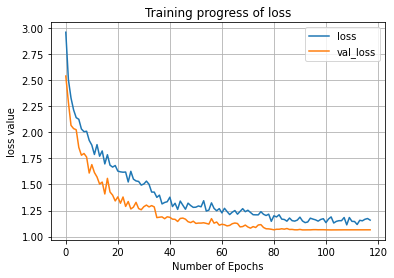

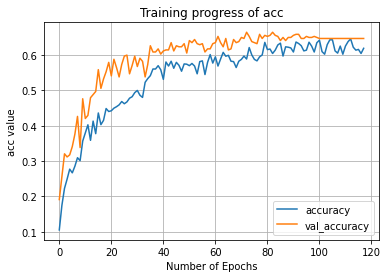

CPU times: user 12min 47s, sys: 2min 1s, total: 14min 49s
Wall time: 8min 47s


In [0]:
%%time
model_0 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=0)
model_0.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_0.evaluate(x_test, y_test)
model_0.plot('loss') ; model_0.plot('acc')


Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.
11/11 [==============================] - 0s 39ms/step - loss: 1.1111 - accuracy: 0.6118
Evaluated loss: 1.1111458539962769
Evaluated accuracy: 0.6117647290229797


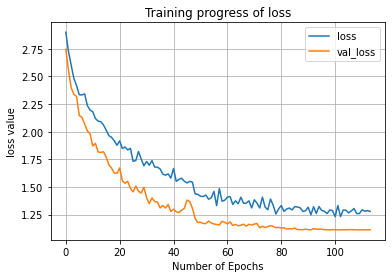

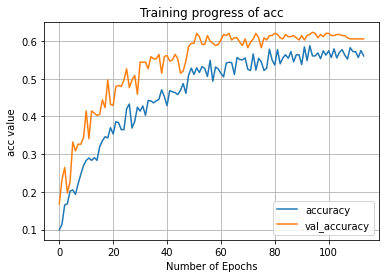

CPU times: user 12min 41s, sys: 1min 53s, total: 14min 34s
Wall time: 8min 20s


In [0]:
%%time
model_1 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=1)
model_1.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_1.evaluate(x_test, y_test)
model_1.plot('loss') ; model_1.plot('acc')


Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00061: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.
11/11 [==============================] - 0s 44ms/step - loss: 1.0056 - accuracy: 0.6706
Evaluated loss: 1.005551815032959
Evaluated accuracy: 0.6705882549285889


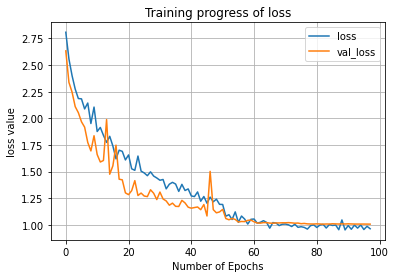

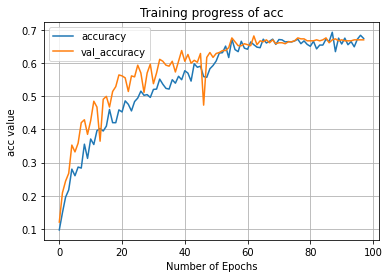

CPU times: user 10min 43s, sys: 1min 59s, total: 12min 43s
Wall time: 8min 38s


In [0]:
%%time
model_2 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=2)
model_2.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_2.evaluate(x_test, y_test)
model_2.plot('loss') ; model_2.plot('acc')


Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00103: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.
11/11 [==============================] - 1s 49ms/step - loss: 0.9797 - accuracy: 0.6735
Evaluated loss: 0.9796525835990906
Evaluated accuracy: 0.6735293865203857


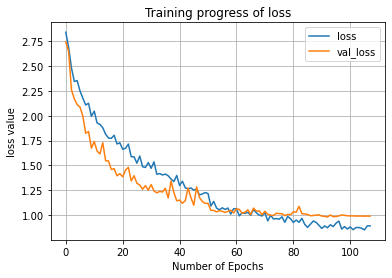

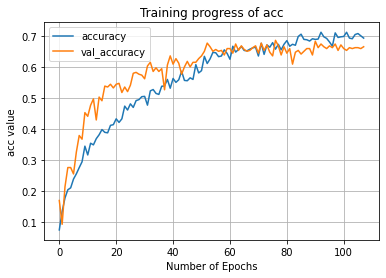

CPU times: user 11min 46s, sys: 2min 35s, total: 14min 21s
Wall time: 10min 50s


In [0]:
%%time
model_3 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=3)
model_3.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_3.evaluate(x_test, y_test)
model_3.plot('loss') ; model_3.plot('acc')


Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00082: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00094: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 1.3717419885021323e-05.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 4.572473396062074e-06.
11/11 [==============================] - 1s 55ms/step - loss: 0.9871 - accuracy: 0.6676
Evaluated loss: 0.9871299862861633
Evaluated accuracy: 0.6676470637321472


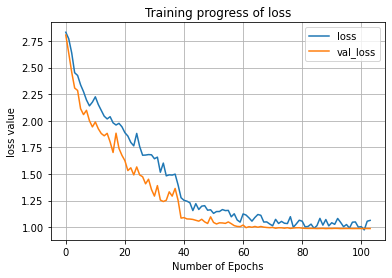

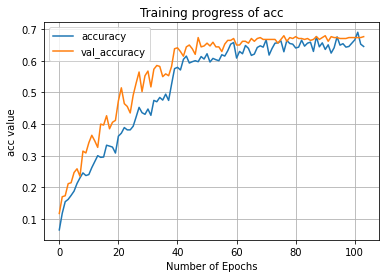

CPU times: user 11min 58s, sys: 2min 46s, total: 14min 44s
Wall time: 11min 44s


In [0]:
%%time
model_4 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=4)
model_4.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_4.evaluate(x_test, y_test)
model_4.plot('loss') ; model_4.plot('acc')


Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00080: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.
11/11 [==============================] - 1s 51ms/step - loss: 1.0068 - accuracy: 0.6765
Evaluated loss: 1.0067744255065918
Evaluated accuracy: 0.6764705777168274


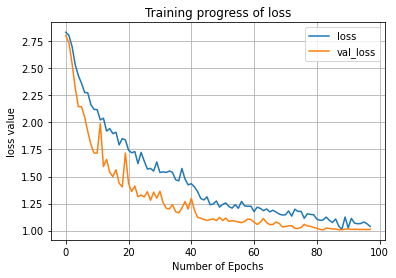

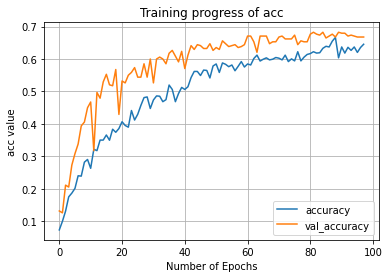

CPU times: user 10min 52s, sys: 2min 16s, total: 13min 9s
Wall time: 9min 56s


In [0]:
%%time
model_5 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=5)
model_5.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_5.evaluate(x_test, y_test)
model_5.plot('loss') ; model_5.plot('acc')


Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.003333333258827527.

Epoch 00081: ReduceLROnPlateau reducing learning rate to 0.0011111110604057708.

Epoch 00094: ReduceLROnPlateau reducing learning rate to 0.00037037034053355455.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 0.0001234567801778515.

Epoch 00104: ReduceLROnPlateau reducing learning rate to 4.115225844240437e-05.
11/11 [==============================] - 0s 23ms/step - loss: 1.1734 - accuracy: 0.6235
Evaluated loss: 1.173420786857605
Evaluated accuracy: 0.6235294342041016


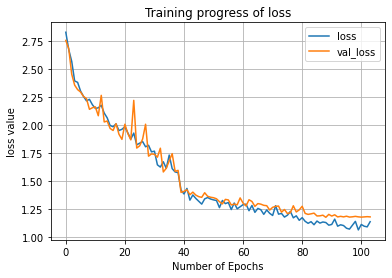

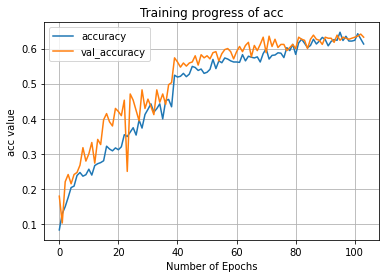

CPU times: user 11min 17s, sys: 57.4 s, total: 12min 14s
Wall time: 4min 41s


In [0]:
%%time
model_6 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=6)
model_6.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.01, data_augmentation=True, verbose=0)
model_6.evaluate(x_test, y_test)
model_6.plot('loss') ; model_6.plot('acc')


Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.00011111111962236464.

Epoch 00076: ReduceLROnPlateau reducing learning rate to 3.703703987412155e-05.

Epoch 00081: ReduceLROnPlateau reducing learning rate to 1.2345679958040515e-05.
11/11 [==============================] - 0s 23ms/step - loss: 1.0812 - accuracy: 0.6735
Evaluated loss: 1.081200122833252
Evaluated accuracy: 0.6735293865203857


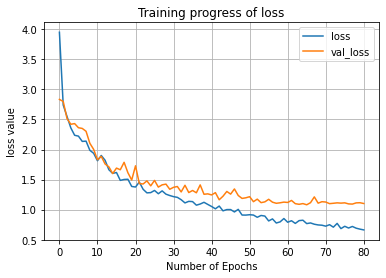

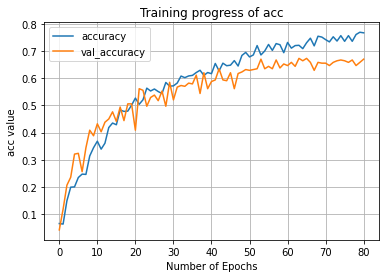

CPU times: user 8min 48s, sys: 52.7 s, total: 9min 41s
Wall time: 3min 55s


In [0]:
%%time
"Training 2.5x time more complex model, to outperform simple ensemble technique using dropout"
model_6 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=6)
model_6.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.001, data_augmentation=True, verbose=0)
model_6.evaluate(x_test, y_test)
model_6.plot('loss') ; model_6.plot('acc')


Epoch 00025: ReduceLROnPlateau reducing learning rate to 3.33333324912625e-05.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 1.1111111234640703e-05.

Epoch 00055: ReduceLROnPlateau reducing learning rate to 3.703703744880234e-06.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 1.2345678896963364e-06.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 1e-06.
11/11 [==============================] - 1s 54ms/step - loss: 0.8598 - accuracy: 0.7265
Evaluated loss: 0.8597793579101562
Evaluated accuracy: 0.7264705896377563


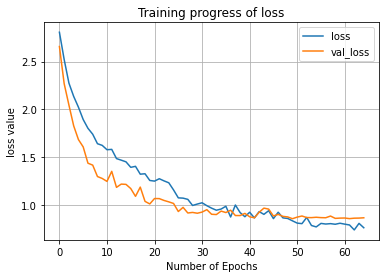

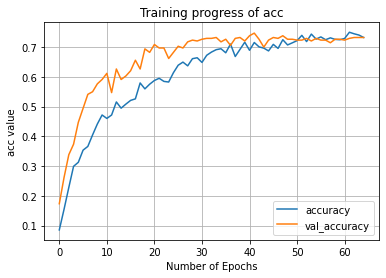

CPU times: user 7min 26s, sys: 1min 42s, total: 9min 8s
Wall time: 6min 21s


In [0]:
%%time
model_7 = DROPOUT_CNN(num_classes, x_train.shape[1:], model_choice=7)
model_7.train( (x_train,y_train), (x_test,y_test), batch_size=64, epochs=300, opt='SGD', lr=0.0001, data_augmentation=True, verbose=0)
model_7.evaluate(x_test, y_test)
model_7.plot('loss') ; model_7.plot('acc')